Processed 00001.json


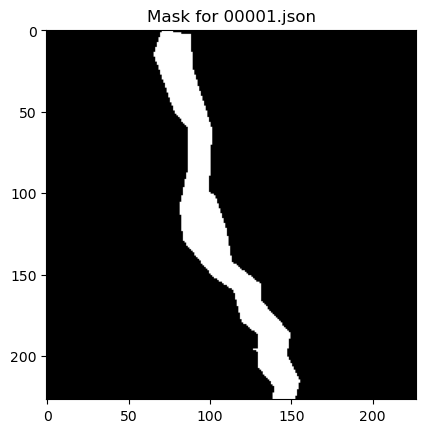

Processed 00003.json


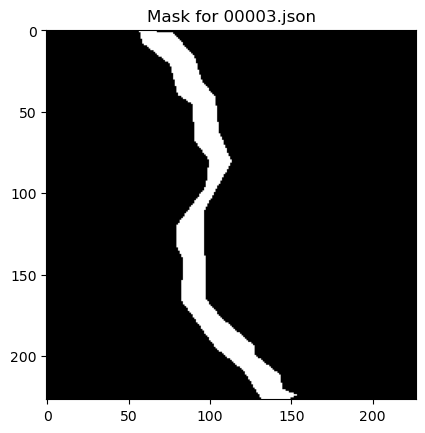

Processed 00004.json


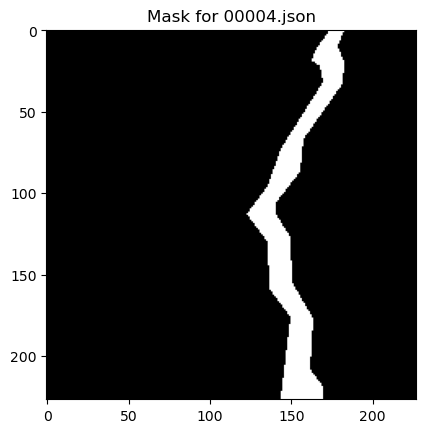

Processed 00005.json


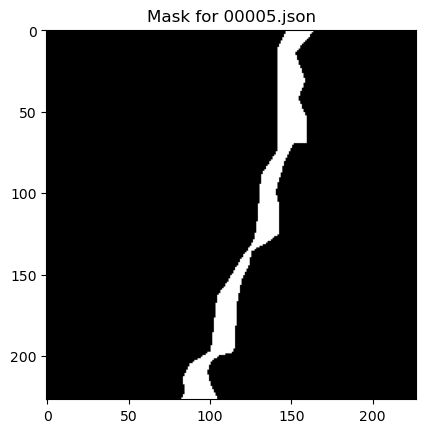

Processed 00006.json


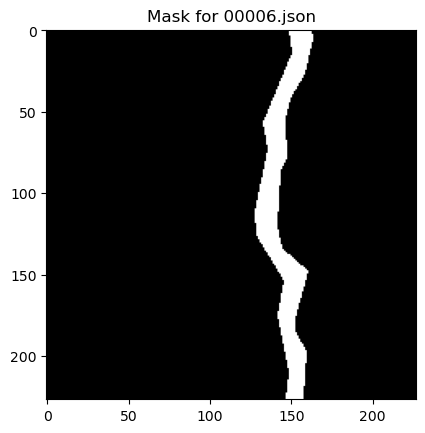

Processed 00007.json


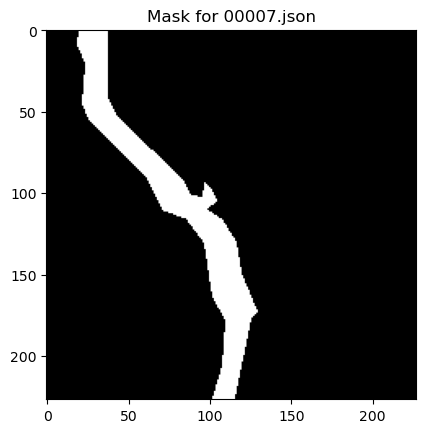

Processed 00008.json


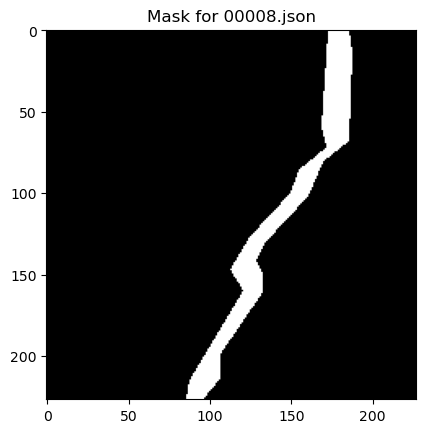

Processed 00009.json


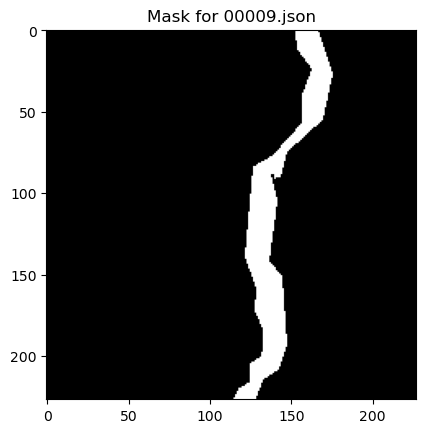

Processed 00010.json


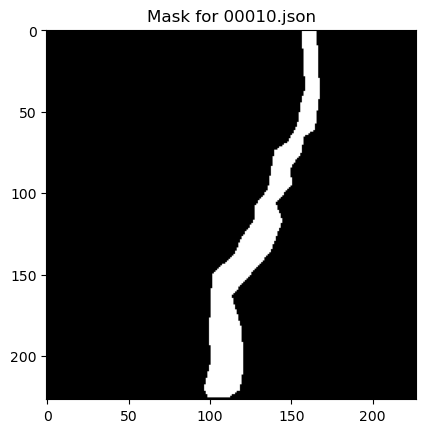

Processed 00011.json


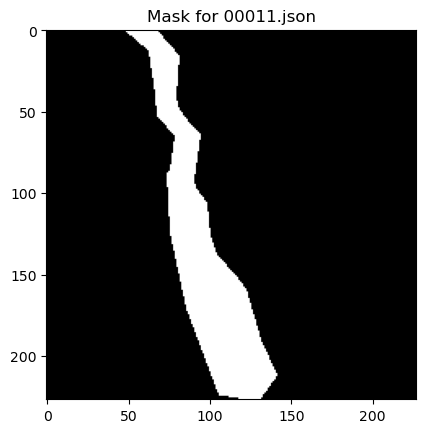

Processed 00012.json


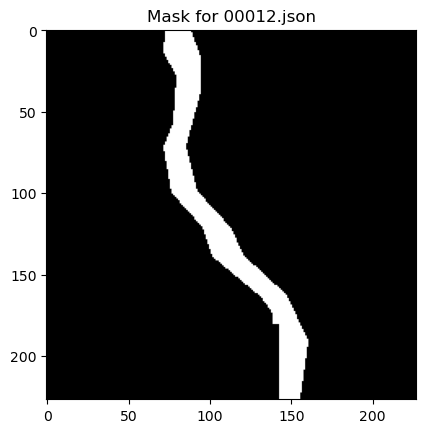

Processed 00013.json


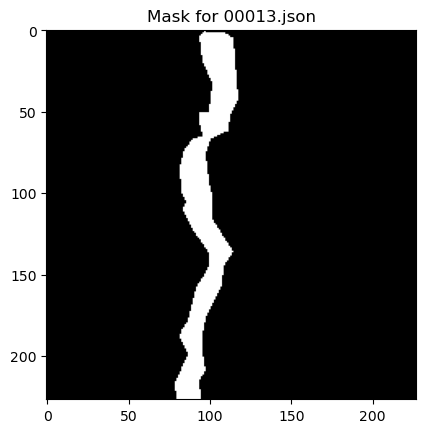

Processed 00014.json


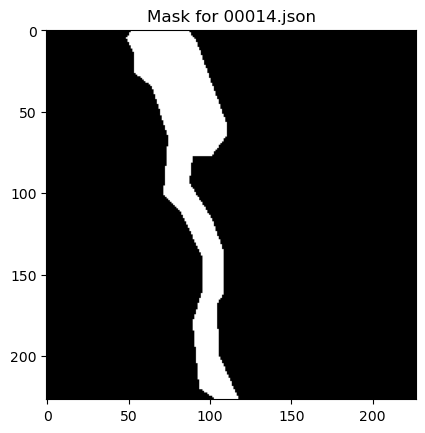

Processed 00015.json


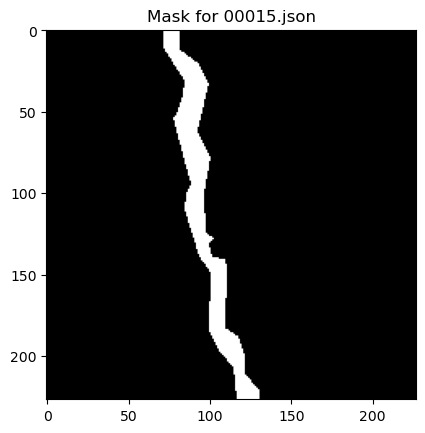

Processed 00016.json


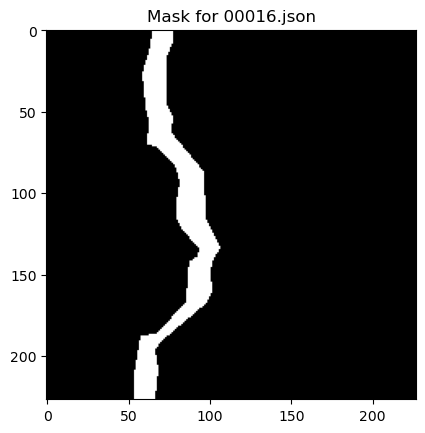

Processed 00017.json


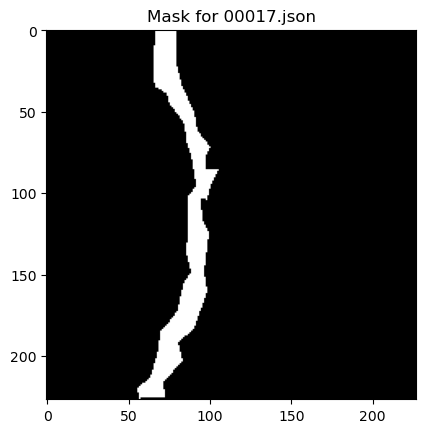

Processed 00018.json


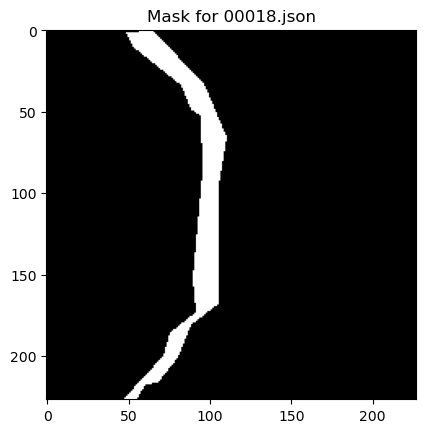

Processed 00019.json


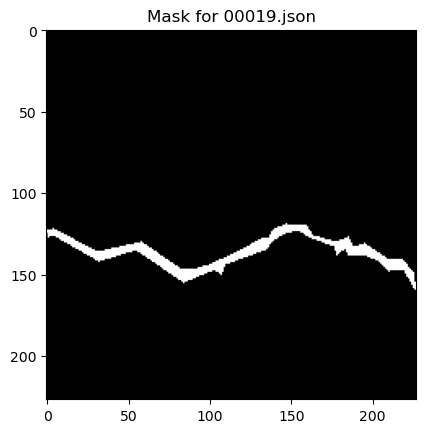

Processed 00020.json


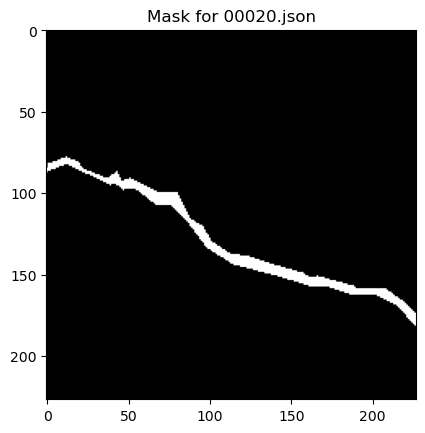

Processed 00077.json


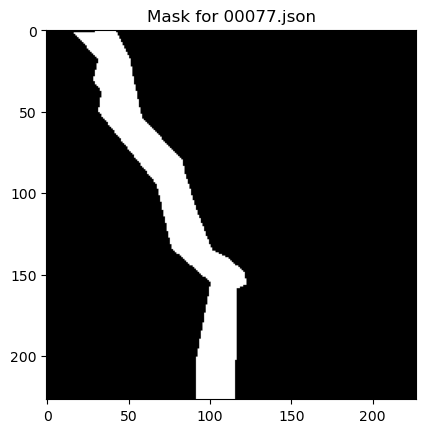

In [4]:
import os
import json
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Define the function to convert JSON to mask
def json_to_mask(json_path, output_path):
    with open(json_path) as f:
        data = json.load(f)
    
    # Assuming all images are the same size, get image dimensions
    img_width = data['imageWidth']
    img_height = data['imageHeight']
    
    mask = Image.new('L', (img_width, img_height), 0)
    draw = ImageDraw.Draw(mask)
    
    for shape in data['shapes']:
        points = shape['points']
        # Ensure points are in the correct format
        points = [(point[0], point[1]) for point in points]
        draw.polygon(points, outline=1, fill=1)
    
    mask.save(output_path)
    return mask

# Define the function to process a folder of JSON files
def process_folder(json_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(json_folder):
        if filename.endswith('.json'):
            json_path = os.path.join(json_folder, filename)
            output_path = os.path.join(output_folder, filename.replace('.json', '.png'))
            mask = json_to_mask(json_path, output_path)
            print(f"Processed {filename}")
            # Display the mask for verification
            plt.imshow(mask, cmap='gray')
            plt.title(f"Mask for {filename}")
            plt.show()

# Set the folder paths
json_folder = r"C:\Users\jerry\Videos\REVISED\labelme images"
output_folder = r"C:\Users\jerry\Videos\REVISED\labelme images\masked"

# Run the processing function
process_folder(json_folder, output_folder)


Processing file: 00001.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00001.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00001.png


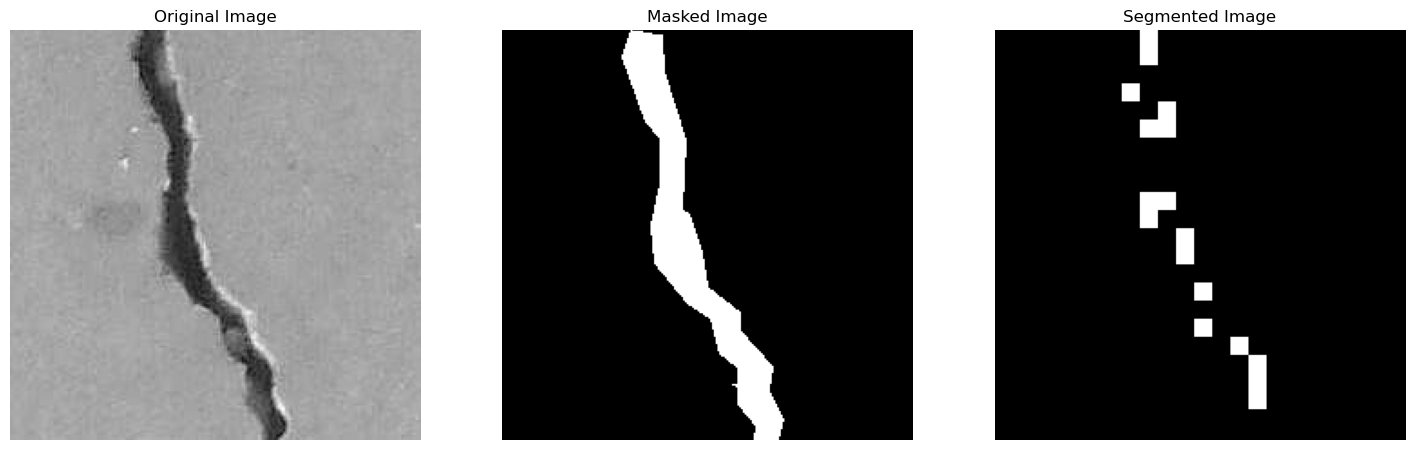

Processing file: 00003.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00003.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00003.png


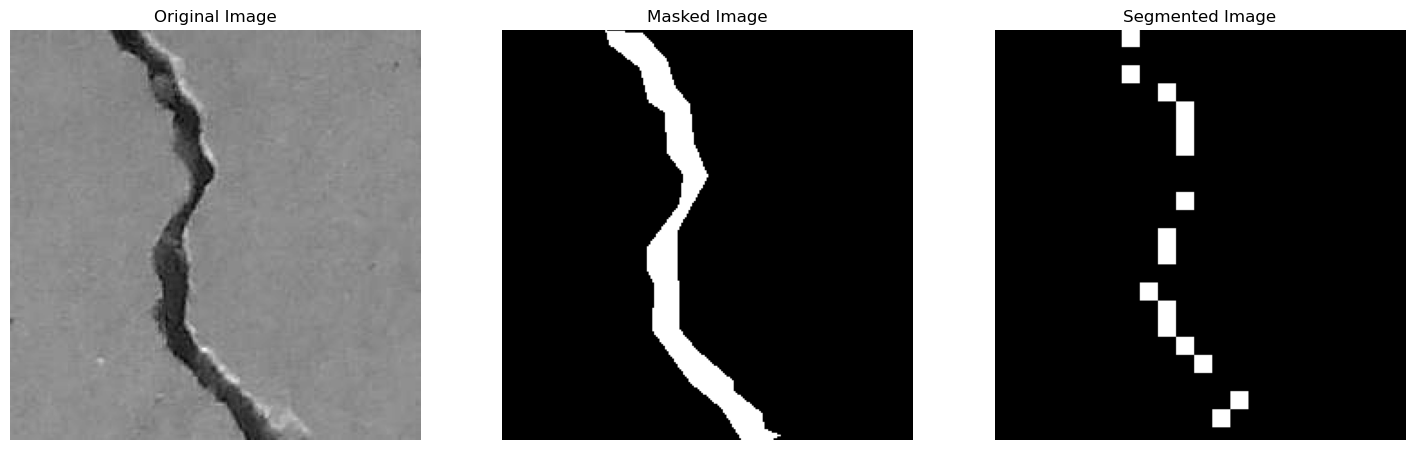

Processing file: 00004.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00004.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00004.png


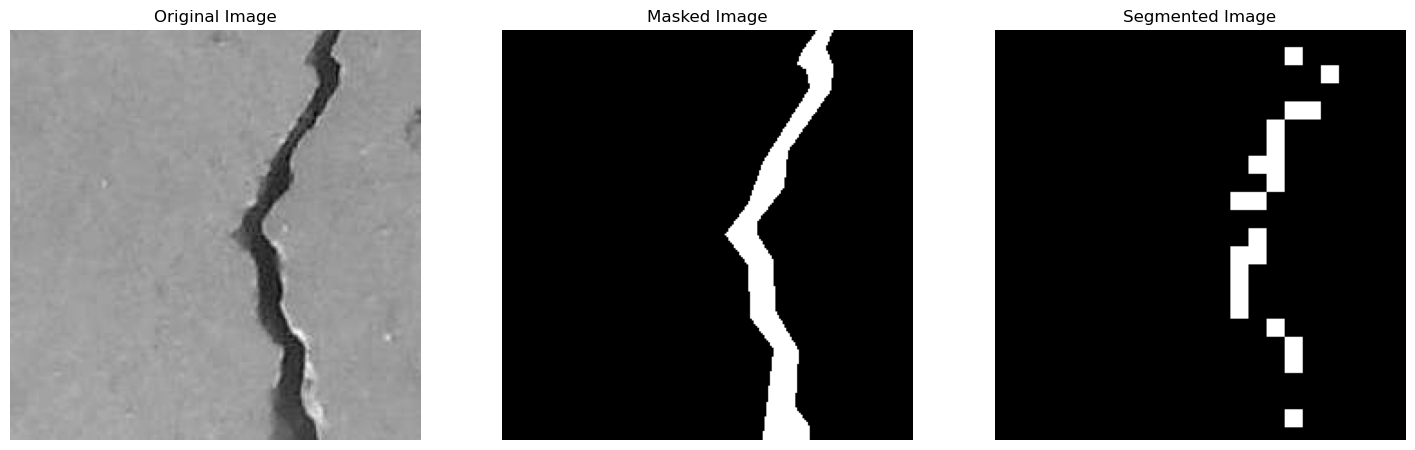

Processing file: 00005.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00005.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00005.png


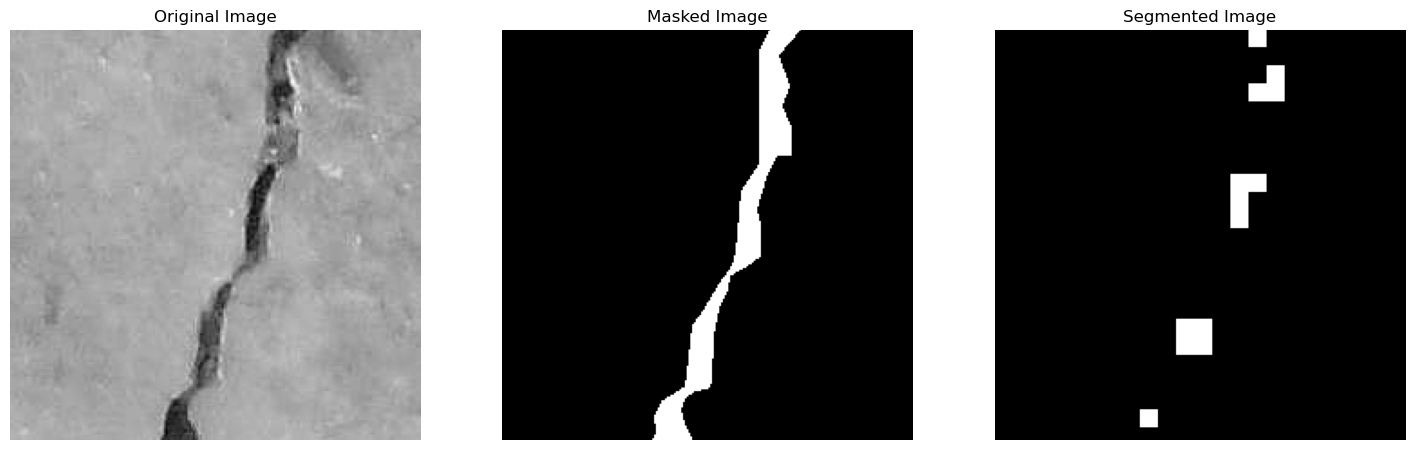

Processing file: 00006.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00006.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00006.png


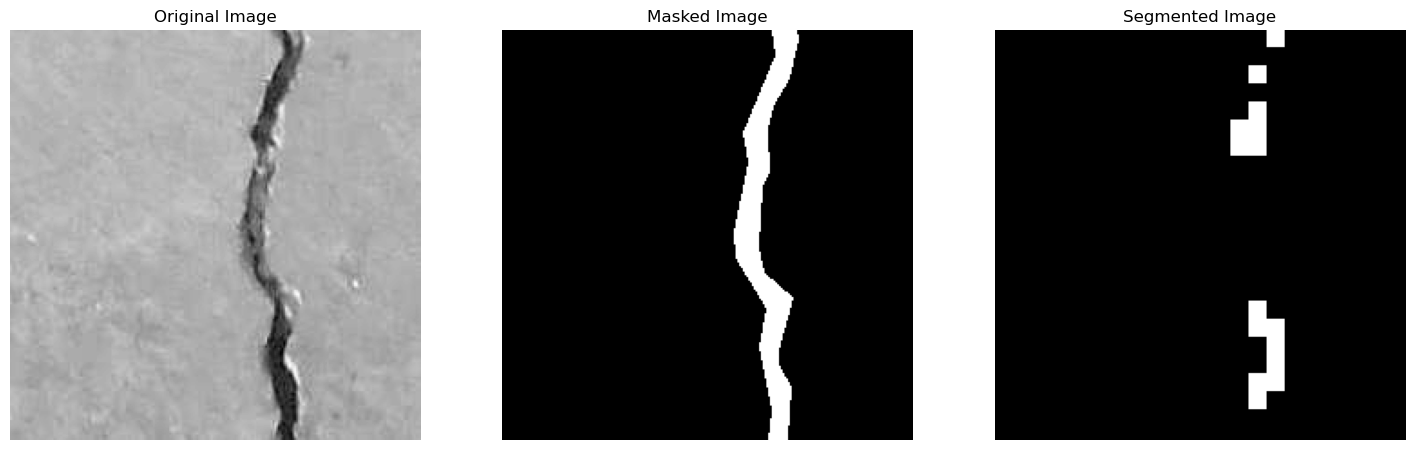

Processing file: 00007.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00007.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00007.png


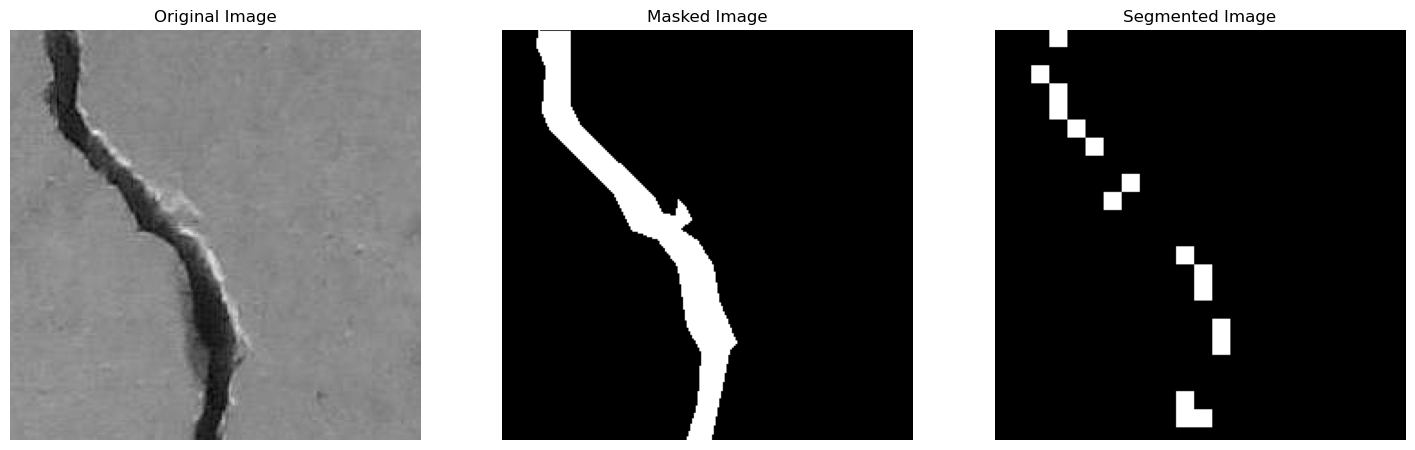

Processing file: 00008.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00008.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00008.png


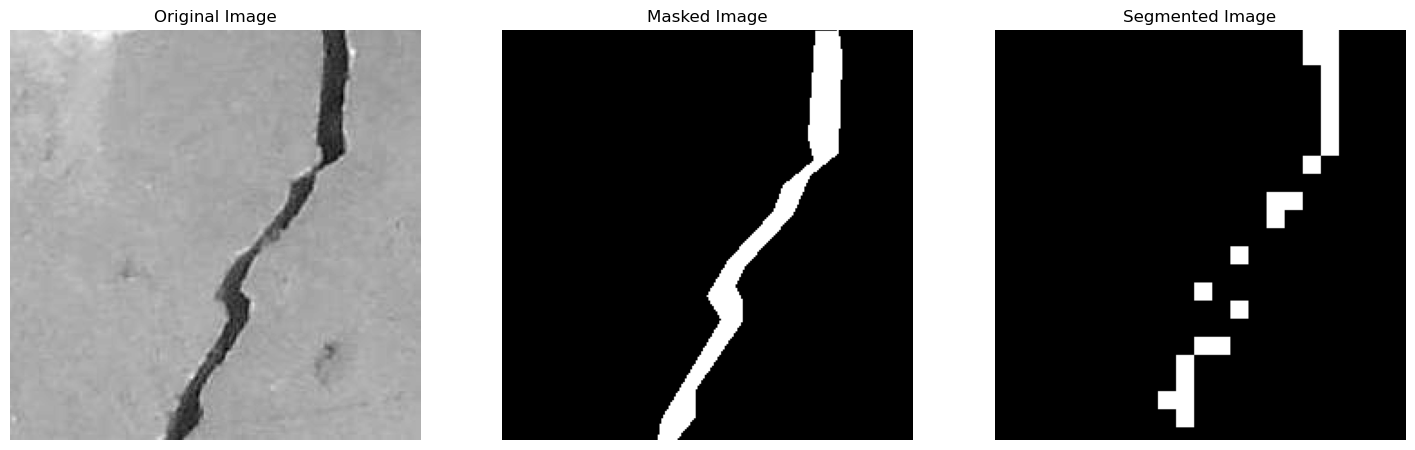

Processing file: 00009.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00009.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00009.png


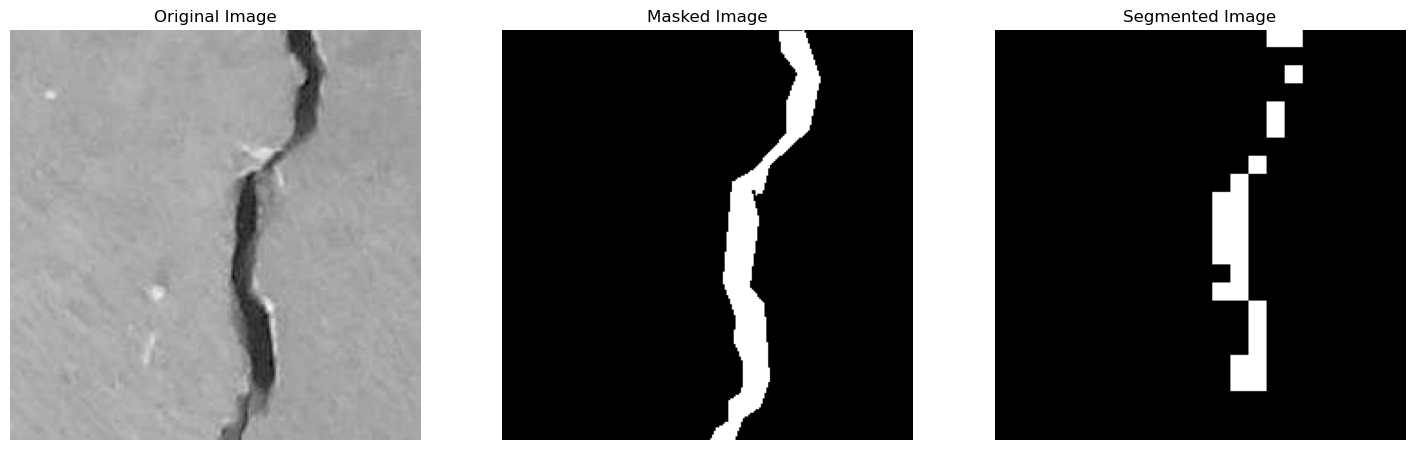

Processing file: 00010.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00010.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00010.png


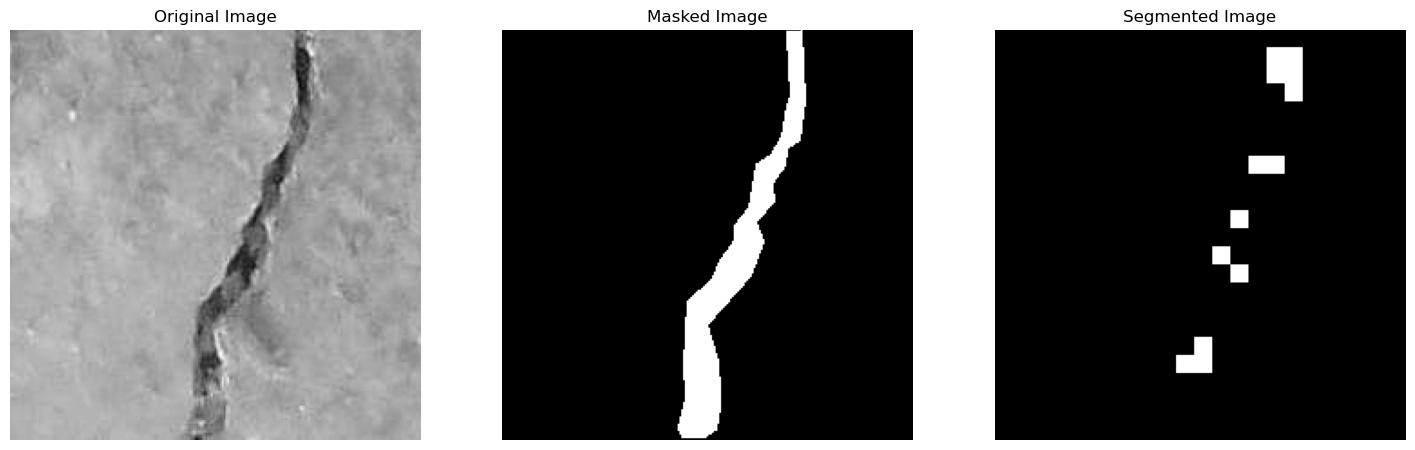

Processing file: 00011.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00011.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00011.png


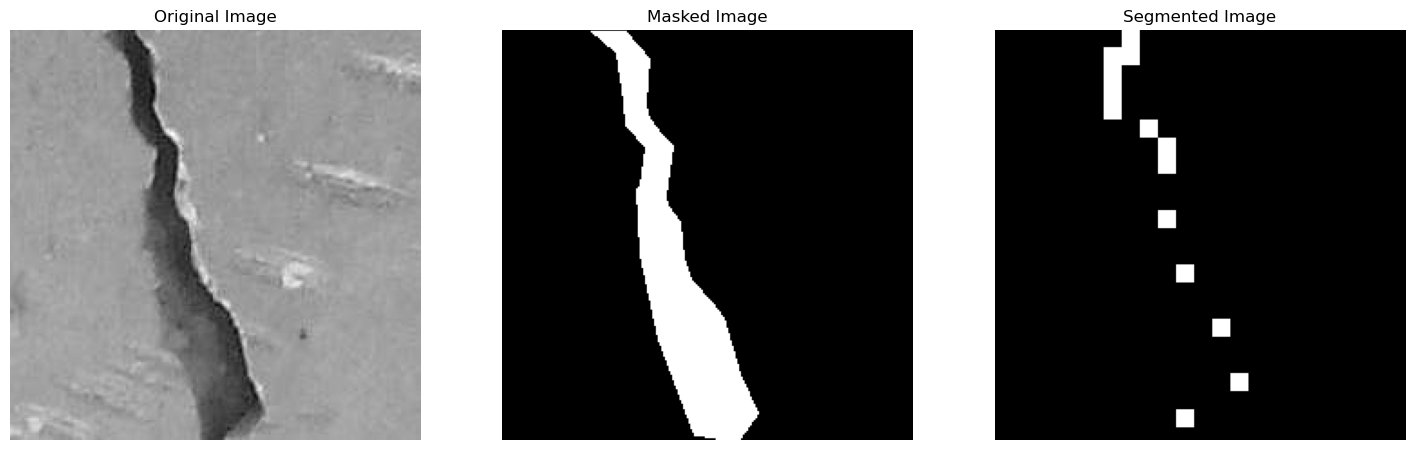

Processing file: 00012.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00012.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00012.png


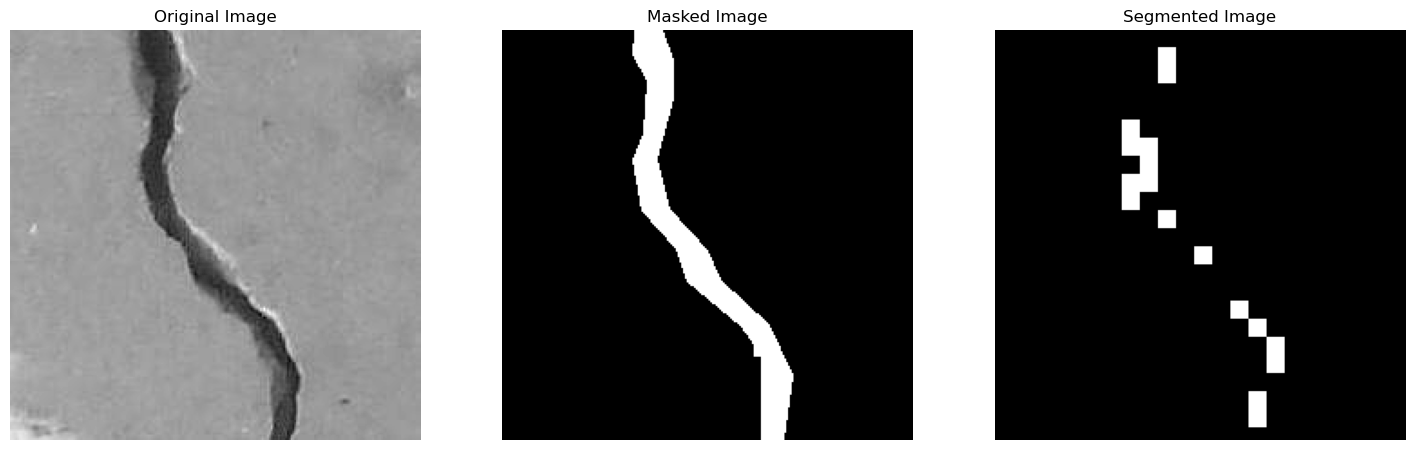

Processing file: 00013.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00013.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00013.png


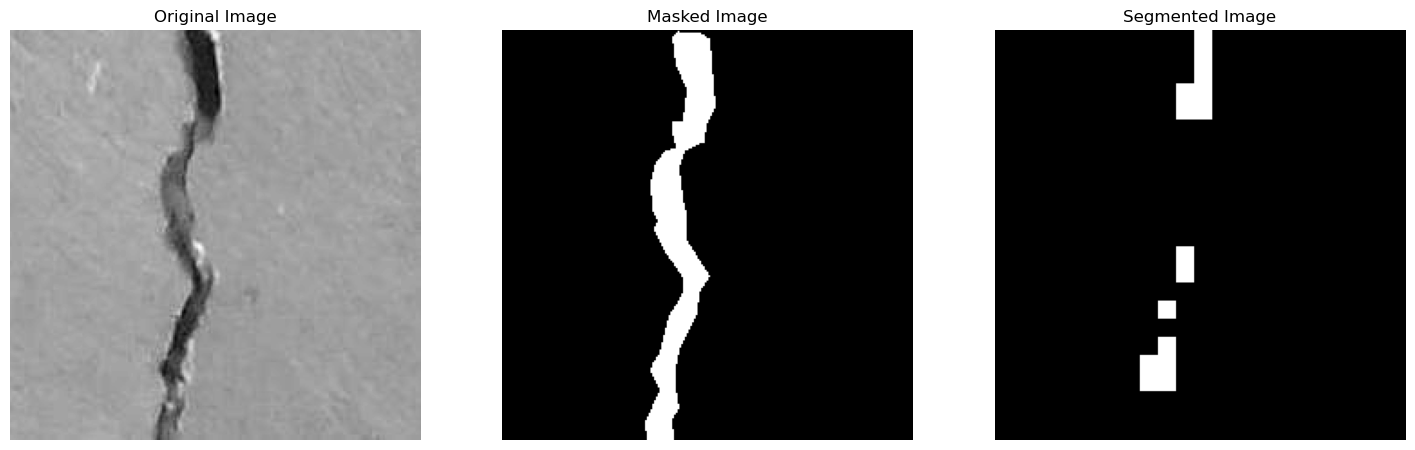

Processing file: 00014.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00014.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00014.png


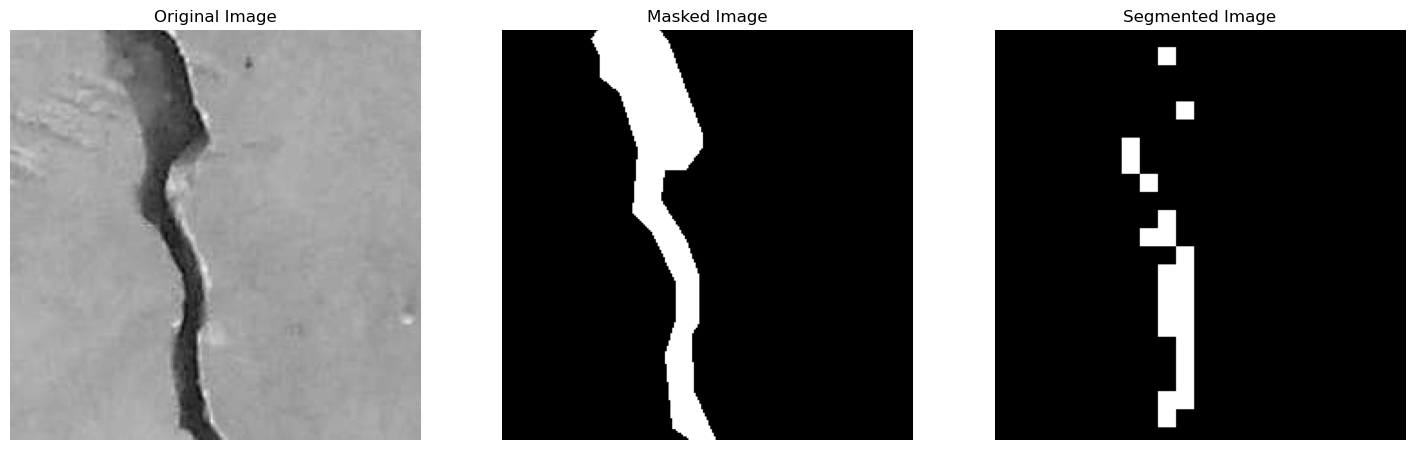

Processing file: 00015.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00015.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00015.png


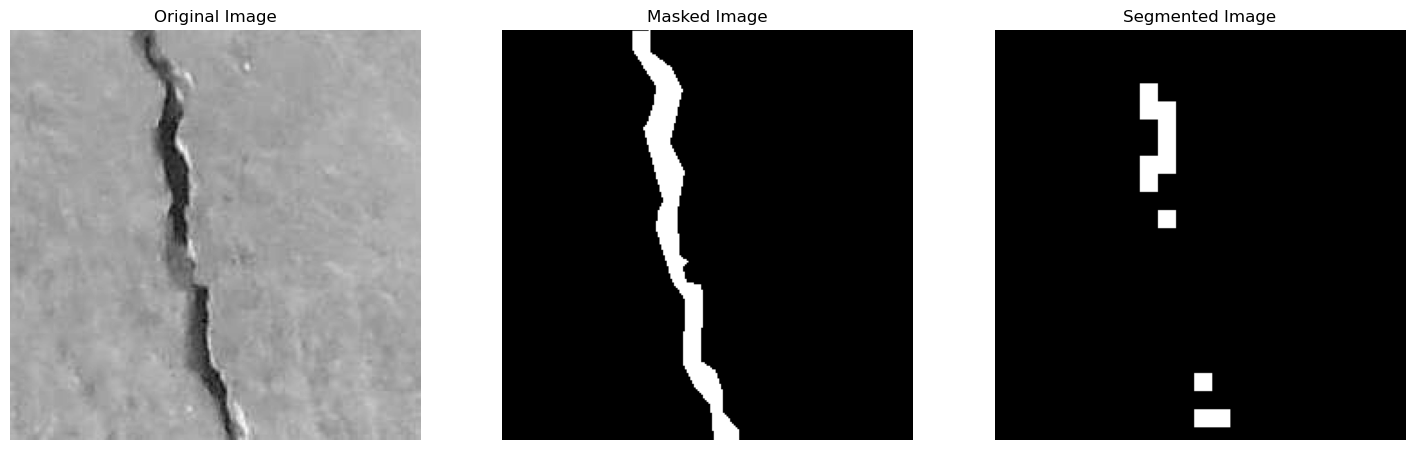

Processing file: 00016.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00016.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00016.png


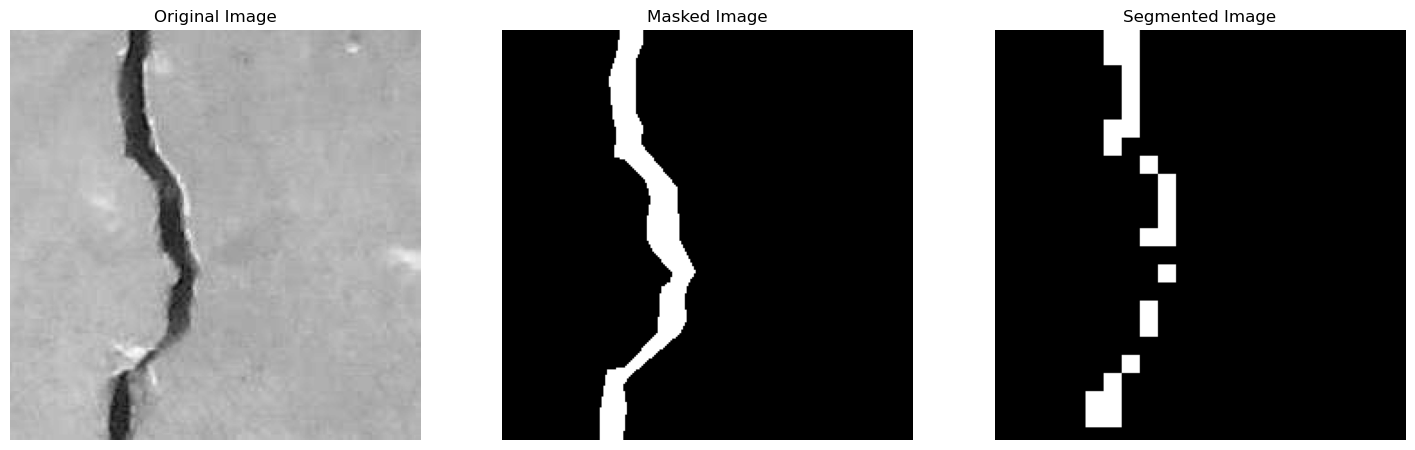

Processing file: 00017.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00017.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00017.png


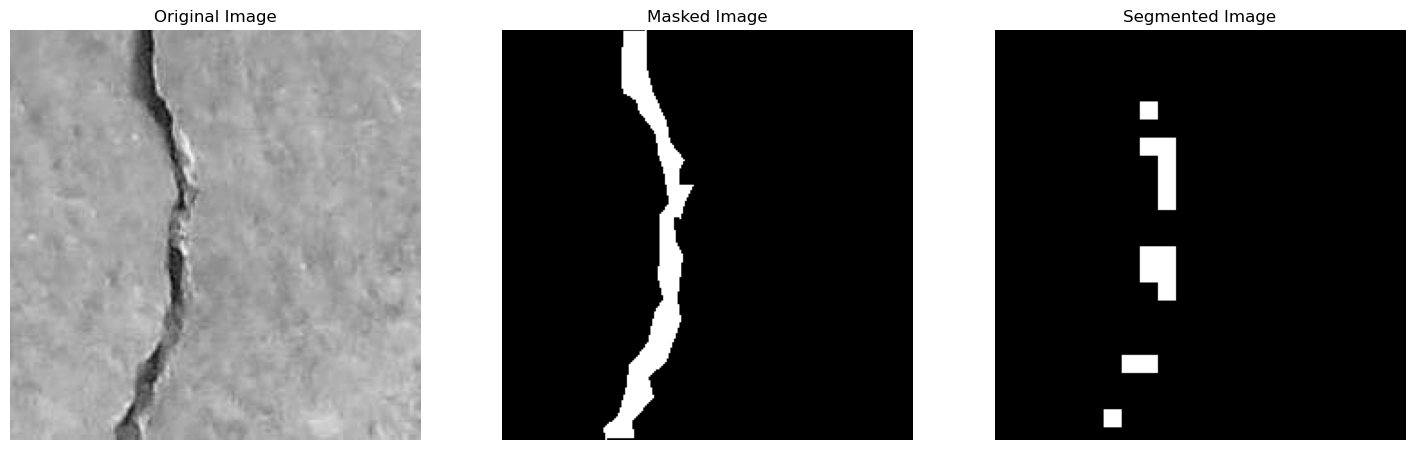

Processing file: 00018.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00018.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00018.png


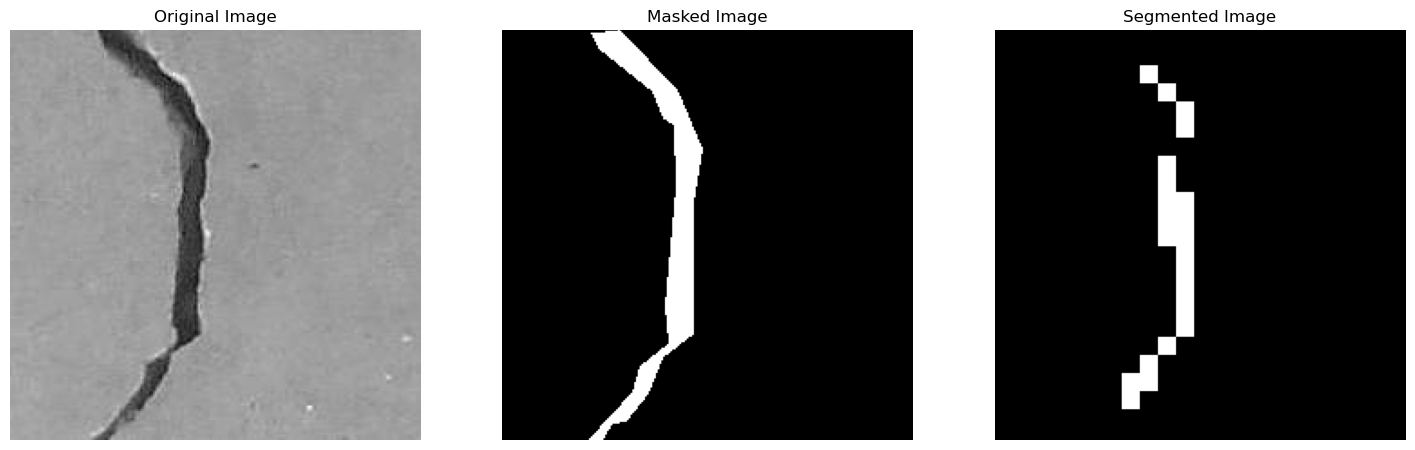

Processing file: 00019.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00019.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00019.png


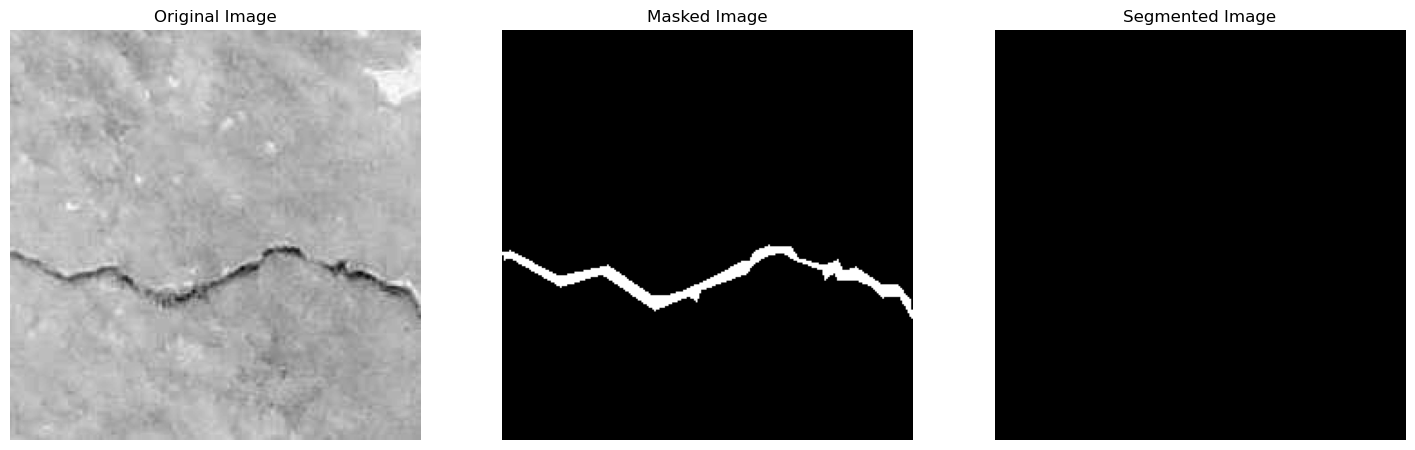

Processing file: 00020.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00020.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00020.png


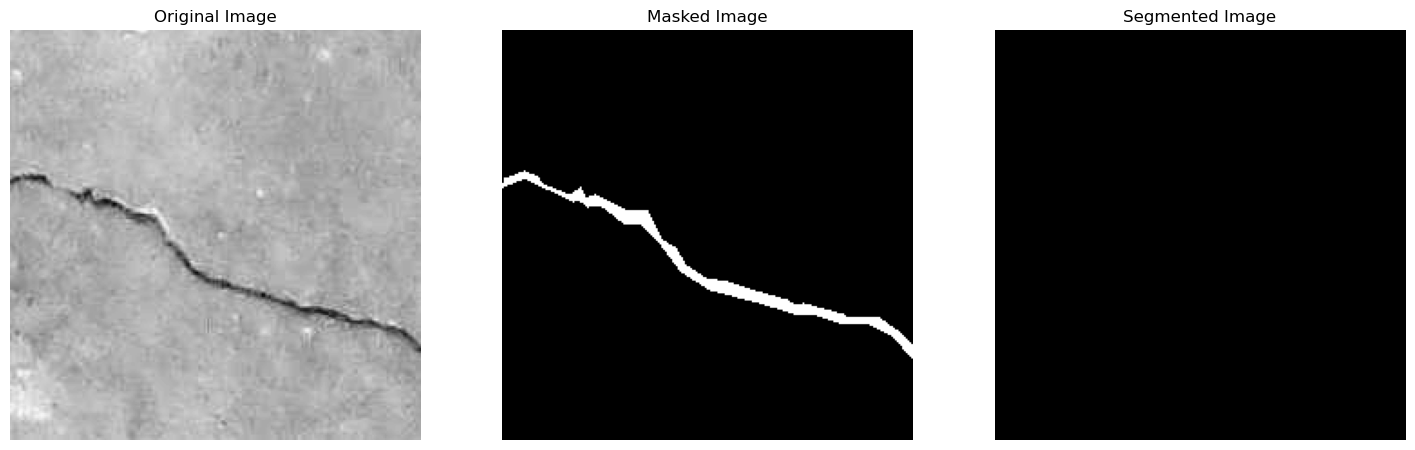

Processing file: 00077.jpg
Original image path: C:\Users\jerry\Videos\REVISED\labelme images\00077.jpg
Masked image path: C:\Users\jerry\Videos\REVISED\labelme images\masked\00077.png


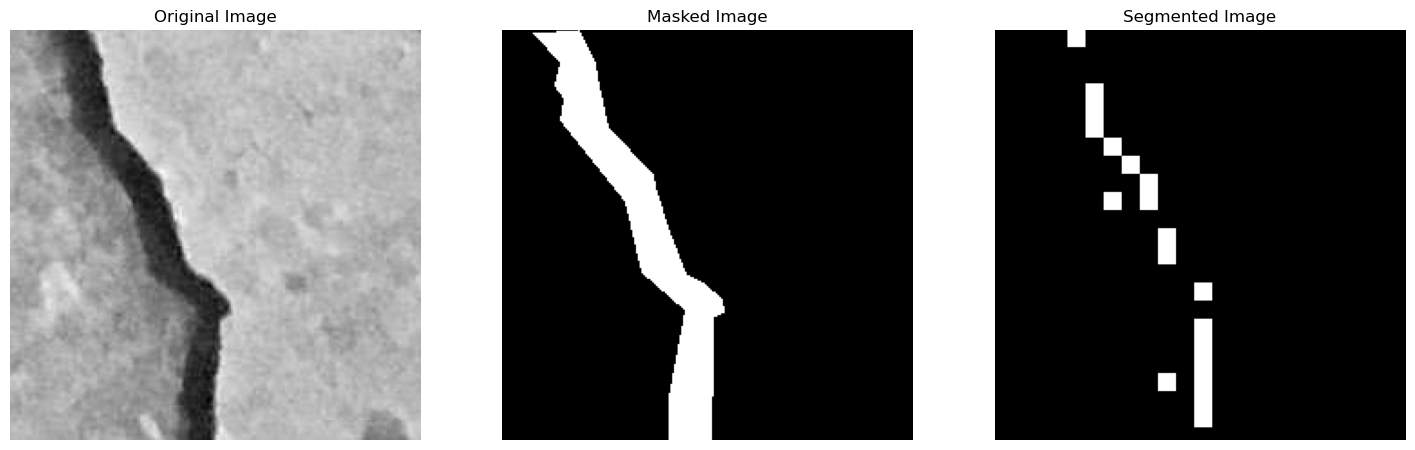

In [7]:
import os
import cv2
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

# Paths to the directories and model file
image_dir = r"C:\Users\jerry\Videos\REVISED\labelme images"
masked_dir = r"C:\Users\jerry\Videos\REVISED\labelme images\masked"
model_filename = r"C:\Users\jerry\Videos\REVISED\kmeans_model.joblib"

# Load the pre-trained K-means model
kmeans = joblib.load(model_filename)

# Function to calculate texture properties of a GLCM like correlation, dissimilarity, and homogeneity
def calculate_texture_properties(img, block_size=10):
    dissim = []
    correl = []
    homogen = []

    (row, col) = img.shape
    for r in range(0, row - block_size, block_size):
        for c in range(0, col - block_size, block_size):
            section = img[r:r + block_size, c:c + block_size]
            glcm = graycomatrix(section, distances=[5], angles=[0], levels=256,
                                symmetric=True, normed=True)
            correl.append(graycoprops(glcm, 'correlation')[0, 0])
            dissim.append(graycoprops(glcm, 'dissimilarity')[0, 0])
            homogen.append(graycoprops(glcm, 'homogeneity')[0, 0])

    return dissim, correl, homogen

# Function to segment an image using the K-means model
def segment_image_kmeans(img, block_size=10):
    dissim, correl, homogen = calculate_texture_properties(img, block_size)
    df_test = pd.DataFrame({
        'correlation': correl,
        'dissimilarity': dissim,
        'homogeneity': homogen
    })
    y_test = kmeans.predict(df_test)

    predict_label_img = np.zeros(img.shape)
    i = 0
    (row, col) = img.shape
    for r in range(0, row - block_size, block_size):
        for c in range(0, col - block_size, block_size):
            predict_label_img[r:r + block_size, c:c + block_size] = y_test[i]
            i += 1

    return predict_label_img

# Function to plot original, masked, and segmented images side by side
def plot_images_side_by_side(original_img_path, masked_img_path):
    # Check if the files exist
    if not os.path.exists(original_img_path):
        print(f"Error: Original image file does not exist: {original_img_path}")
        return
    if not os.path.exists(masked_img_path):
        print(f"Error: Masked image file does not exist: {masked_img_path}")
        return

    # Load the images
    original_img = cv2.imread(original_img_path, cv2.IMREAD_GRAYSCALE)
    masked_img = cv2.imread(masked_img_path, cv2.IMREAD_GRAYSCALE)

    # Check if images are loaded successfully
    if original_img is None:
        print(f"Error: Could not load original image: {original_img_path}")
    if masked_img is None:
        print(f"Error: Could not load masked image: {masked_img_path}")

    # Segment the original image using the pre-trained K-means model
    segmented_img = segment_image_kmeans(original_img)

    if original_img is not None and masked_img is not None and segmented_img is not None:
        # Plot the original image, masked image, and segmented image side by side
        _, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18, 6))

        ax0.axis('off')
        ax0.set_title("Original Image")
        ax0.imshow(original_img, cmap='gray')

        ax1.axis('off')
        ax1.set_title("Masked Image")
        ax1.imshow(masked_img, cmap='gray')

        ax2.axis('off')
        ax2.set_title("Segmented Image")
        ax2.imshow(segmented_img, cmap='gray')

        plt.show()

# Process and plot images
for filename in os.listdir(image_dir):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        original_img_path = os.path.join(image_dir, filename)
        masked_img_path = os.path.join(masked_dir, os.path.splitext(filename)[0] + '.png')  # Assuming masked images are .png

        print(f"Processing file: {filename}")
        print(f"Original image path: {original_img_path}")
        print(f"Masked image path: {masked_img_path}")

        # Plot the images side by side
        plot_images_side_by_side(original_img_path, masked_img_path)
